In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #1

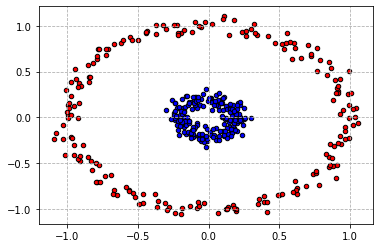

In [2]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.2, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
reds = y == 0
blues = y == 1
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)

plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.grid(linestyle='--')

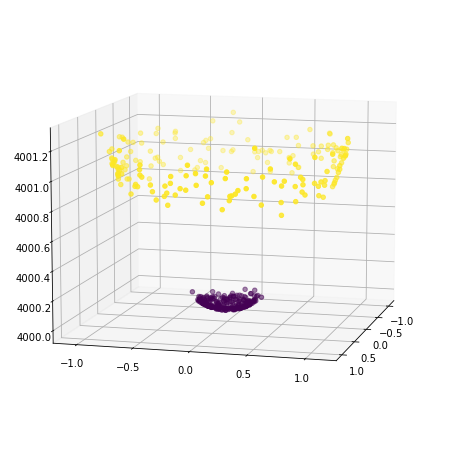

In [3]:
z = X_back[:,0]**2+2000 + X_back[:,1]**2+2000
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(X_back[:,0], X_back[:,1], z, c = reds)
ax.view_init(10, 15)

In [4]:
def pol(x, y):
    r = np.sqrt(x**2 + y**2)
    p = np.arctan2(y, x)
    return np.column_stack((r,p))

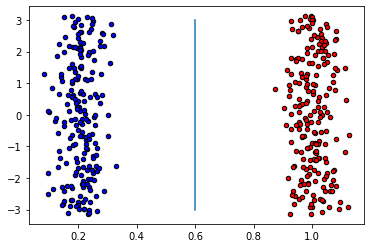

In [5]:
pol = pol(X[:,0], X[:,1])
plt.scatter(pol[reds,0], pol[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(pol[blues, 0],pol[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-3,3,6)
plt.plot([0.6,0.6,0.6,0.6,0.6,0.6], x, linestyle='solid')

# #2

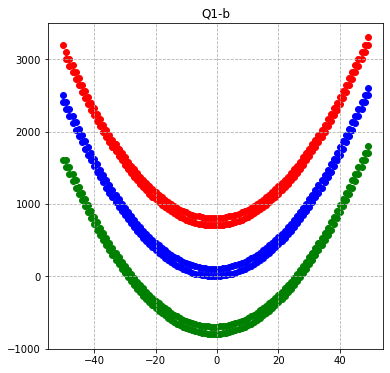

In [6]:
data = np.loadtxt('data1.csv')
plt.figure(figsize=(6, 6))
plt.scatter(data[:200, 0], data[:200, 1], c = 'blue')
plt.scatter(data[201:400, 0], data[201:400, 1], c = 'red')
plt.scatter(data[401:, 0], data[401:, 1], c = 'green')
plt.grid(linestyle='--')
plt.title('Q1-b')
plt.show()

In [7]:
data2 = data.dot(np.array([[1,10, 0.7],[0,0,0.3]]))
data2[:,0] = data2[:,0]**2

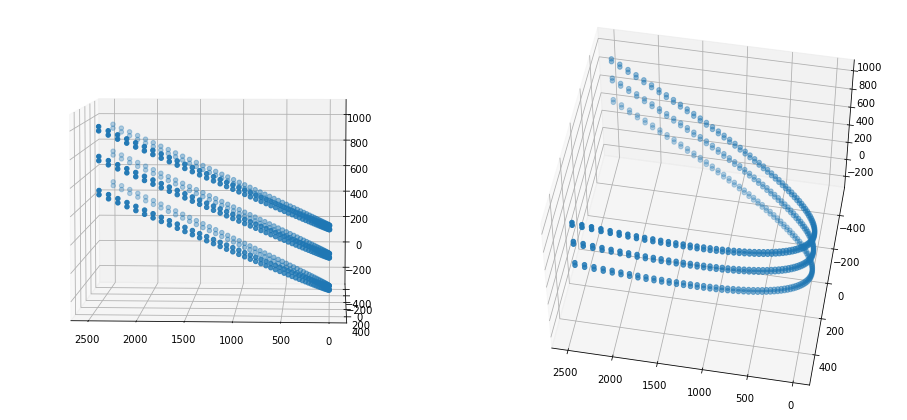

In [8]:
fig = plt.figure(figsize=(16,10))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2])
ax.view_init(6,93)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2])
ax.view_init(50,100)

# Perceptron

In [9]:
def perceptron_d(row, weights, threshold = 0.0):
    activation = weights[len(row)]
    for i in range(len(row)):
        activation = activation + weights[i] * row[i]
        
    if activation >= threshold:
        return 1.0
    else:
        return 0.0

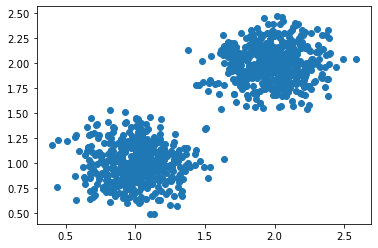

In [10]:
centers = [[1, 1],  [2,2]]
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=0.2)

plt.scatter(X[:,0], X[:,1])

## Iteration by hand

In [11]:
weights = [1, 1, -2.9]
def calculate_error(weights, data):
    i = 0
    error = 0
    predictions = []
    for row in data:
        prediction = perceptron_d(row, weights)
        predictions.append(prediction)
        error = error + np.abs(prediction - y[i])
        i = i + 1
    print("Total Error: ", error)
    return predictions

Total Error:  0.0


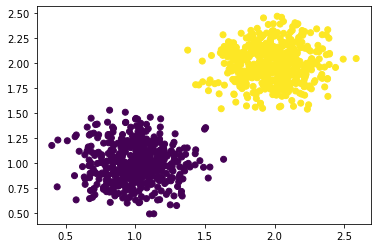

In [12]:
predictions = calculate_error(weights, X)
plt.scatter(X[:,0], X[:,1], c = predictions)

# Iteration by algorithm

In [13]:
def train_perceptron(X, y):
    learning_rate = 0.01
    epoch = 20
    iterations = 0
    error = len(X)
    weights = [0, 0, 0]

    while(iterations < epoch and error != 0):
        iterations += 1
        i = 0
        error = 0
        predictions = []
        for row in X:
            prediction = perceptron_d(row, weights)
            predictions.append(prediction)
            error = error + np.abs(prediction - y[i])        
            i = i + 1

        if error == 0:
            break

        new_weights = weights
        i = 0
        for row in X:
            diff = y[i] - perceptron_d(row, weights) 
            new_weights[len(row)] =  new_weights[len(row)] + learning_rate * diff
            j = 0
            for column in row:
                weights[j] = weights[j] + diff * learning_rate * column
                j += 1
            i += 1

        weights = new_weights

    print("Iterations: ", iterations)
    print("total error: % ", error/len(X)*100)
    return weights

In [14]:
weights = train_perceptron(X, y)
weights

Iterations:  2
total error: %  0.0


[0.004487179266936441, 0.00941970631889659, -0.02]

Total Error:  0.0


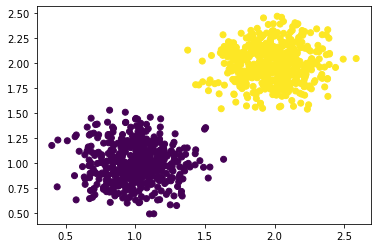

In [15]:
predictions = calculate_error(weights, X)
plt.scatter(X[:,0], X[:,1], c = predictions)